In [325]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [326]:
df = pd.read_excel('../Telco_customer_churn_adapted_v2.xlsx', sheet_name='D A T A')
copy_df = df.copy()
copy_df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,1710,1,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.505,Yes,5371.6
1,1094,9,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.635,Yes,7023.9
2,143,12,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.700,Yes,4595.5
3,1140,1,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.830,Yes,7657.0
4,244,7,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Pulsa,25.025,Yes,5835.7


In [327]:
numerical_column = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']
num_df = df.loc[:, numerical_column]

In [328]:
X = num_df
X.head()

,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR)
0,1,24.505,5371.6
1,9,24.635,7023.9
2,12,24.700,4595.5
3,1,24.830,7657.0
4,7,25.025,5835.7


In [329]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    df[f'cluster{i}'] = km.labels_

Text(0, 0.5, 'Inertia')

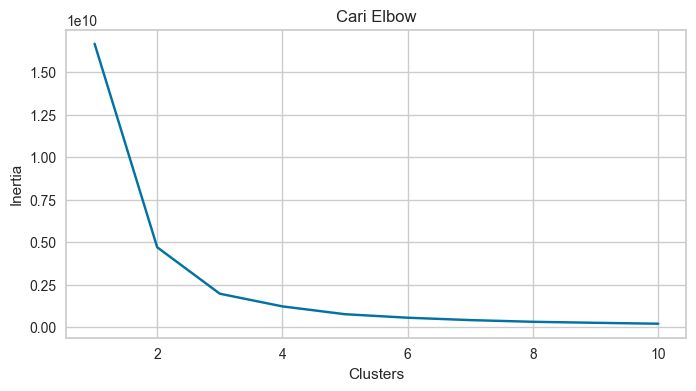

In [330]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

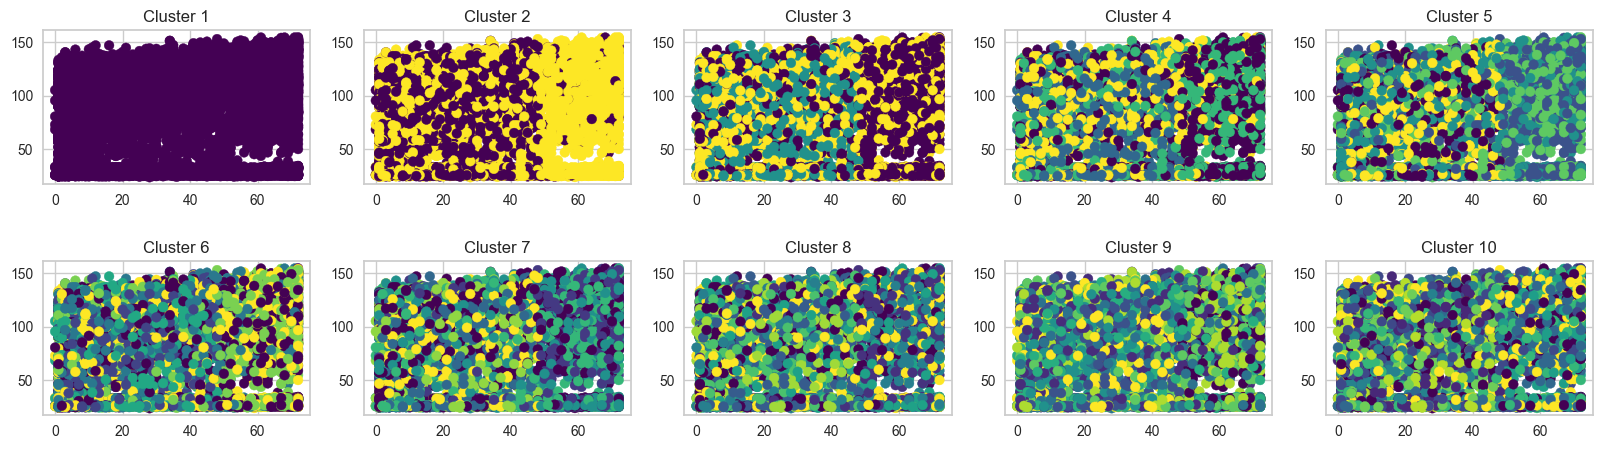

In [331]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(20, 5))
plt.subplots_adjust(hspace=0.5)

for i, ax in enumerate(fig.axes, start = 1):
    # print(df[f'cluster{i}'])
    ax.scatter(x=X['Tenure Months'], y=X['Monthly Purchase (Thou. IDR)'], c = df[f'cluster{i}'], cmap='viridis')
    # ax.set_ylim(3, 1.5)
    # ax.set_xlim(0, 1)
    ax.set_title(f'Cluster {i}')

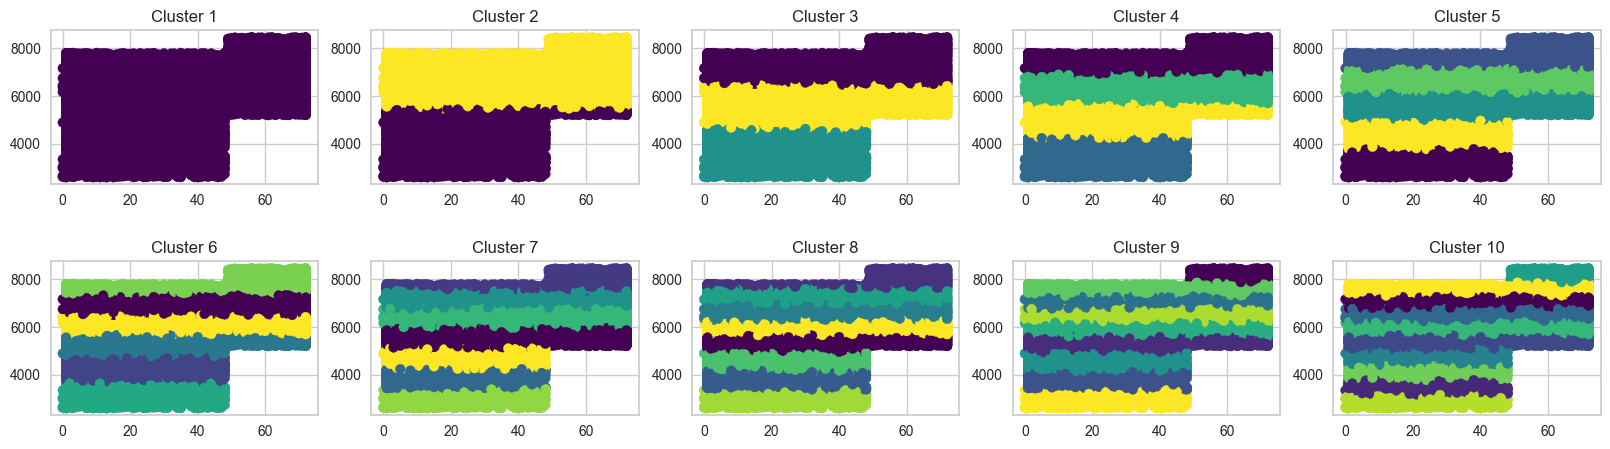

In [332]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(20, 5))
plt.subplots_adjust(hspace=0.5)

for i, ax in enumerate(fig.axes, start = 1):
    # print(df[f'cluster{i}'])
    ax.scatter(x=X['Tenure Months'], y=X['CLTV (Predicted Thou. IDR)'], c = df[f'cluster{i}'], cmap='viridis')
    # ax.set_ylim(3, 1.5)
    # ax.set_xlim(0, 1)
    ax.set_title(f'Cluster {i}')

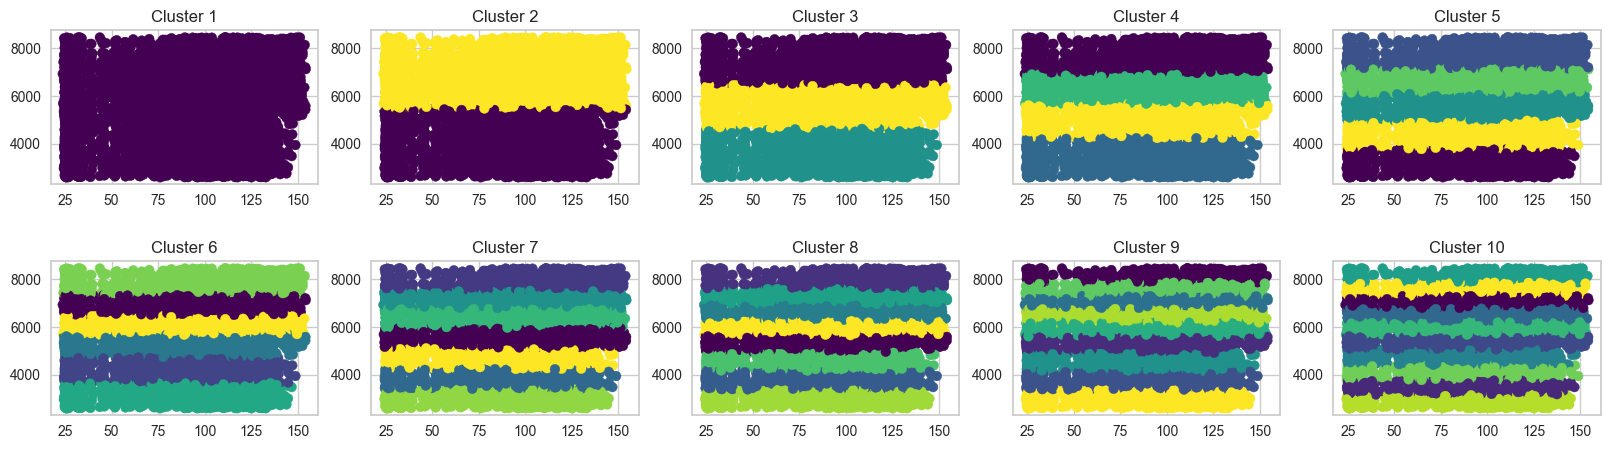

In [333]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(20, 5))
plt.subplots_adjust(hspace=0.5)

for i, ax in enumerate(fig.axes, start = 1):
    # print(df[f'cluster{i}'])
    ax.scatter(x=X['Monthly Purchase (Thou. IDR)'], y=X['CLTV (Predicted Thou. IDR)'], c = df[f'cluster{i}'], cmap='viridis')
    # ax.set_ylim(3, 1.5)
    # ax.set_xlim(0, 1) 
    ax.set_title(f'Cluster {i}')

In [334]:
# membuat objek KMeans
km3 = KMeans(n_clusters=4).fit(X)
 
# menambahkan kolom label pada dataset
X['Cluster w/o PCA'] = km3.labels_

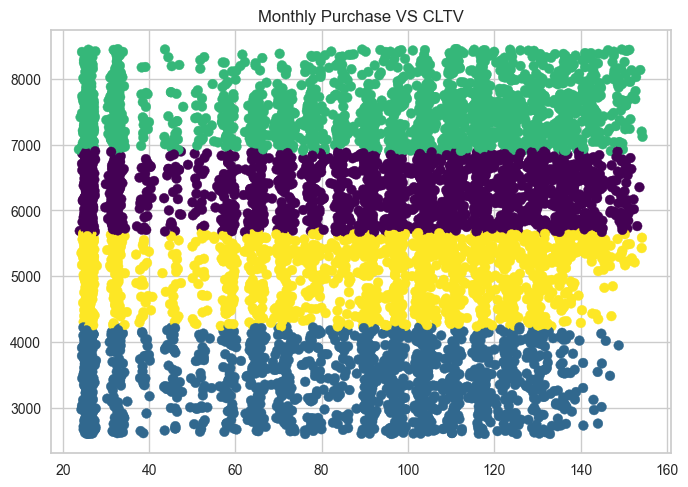

In [335]:
# Membuat scatter plot
plt.scatter(x=X['Monthly Purchase (Thou. IDR)'], y=X['CLTV (Predicted Thou. IDR)'], c=X['Cluster w/o PCA'], cmap='viridis')
# Menambahkan judul
plt.title('Monthly Purchase VS CLTV')
# Menampilkan plot
plt.show()

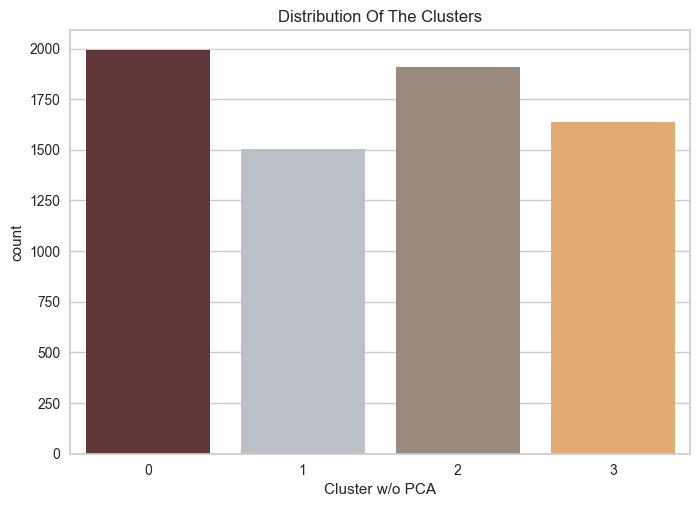

In [336]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=X["Cluster w/o PCA"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [337]:
X

,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Cluster w/o PCA
0,1,24.505,5371.6,3
1,9,24.635,7023.9,2
2,12,24.700,4595.5,3
3,1,24.830,7657.0,2
4,7,25.025,5835.7,0
...,...,...,...,...
7038,72,27.495,6897.8,0
7039,24,110.240,2782.0,1
7040,72,134.160,7228.0,2
7041,11,38.480,3630.9,1


In [338]:
merge_df = copy_df.merge(X, left_index=True, right_index=True, how='inner', suffixes=('_left', '_right'))
merge_df.head()

,Customer ID,Tenure Months_left,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Tenure Months_right,Monthly Purchase (Thou. IDR)_right,CLTV (Predicted Thou. IDR)_right,Cluster w/o PCA
0,1710,1,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.505,Yes,5371.6,1,24.505,5371.6,3
1,1094,9,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.635,Yes,7023.9,9,24.635,7023.9,2
2,143,12,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.700,Yes,4595.5,12,24.700,4595.5,3
3,1140,1,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.830,Yes,7657.0,1,24.830,7657.0,2
4,244,7,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Pulsa,25.025,Yes,5835.7,7,25.025,5835.7,0


In [339]:
new_df = merge_df.drop([merge_df.columns[14], merge_df.columns[15], merge_df.columns[16]], axis=1)
new_df.head()

,Customer ID,Tenure Months_left,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA
0,1710,1,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.505,Yes,5371.6,3
1,1094,9,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.635,Yes,7023.9,2
2,143,12,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.700,Yes,4595.5,3
3,1140,1,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.830,Yes,7657.0,2
4,244,7,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Pulsa,25.025,Yes,5835.7,0


In [340]:
new_df['Games Product'].value_counts()

No                     3497
Yes                    2019
No internet service    1526
                          1
Name: Games Product, dtype: int64

In [341]:
#ordinal mapping
map_dev = {
    'Low End': 0,
    'Mid End': 1,
    'High End': 2,
}

map_prod = {
    'No internet service': 0,
    'No': 1,
    'Yes': 2,
}

map_churn = {
    'No': 0,
    'Yes': 1,
}

In [342]:
new_df.columns

Index(['Customer ID', 'Tenure Months_left', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)_left', 'Churn Label',
       'CLTV (Predicted Thou. IDR)_left', 'Cluster w/o PCA'],
      dtype='object')

In [343]:
# Terapkan mapping ke kolom dataframe
new_df['Device Class'] = new_df['Device Class'].map(map_dev)
new_df['Churn Label'] = new_df['Churn Label'].map(map_churn)

prod_cols = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']
for col in prod_cols:
    # Terapkan mapping ke kolom dataframe
    new_df[col] = new_df[col].map(map_prod)

new_df.head()

,Customer ID,Tenure Months_left,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA
0,1710,1,Jakarta,0,0.0,0,0,1,0,0,Digital Wallet,24.505,1,5371.6,3
1,1094,9,Jakarta,0,0.0,0,0,1,0,0,Digital Wallet,24.635,1,7023.9,2
2,143,12,Jakarta,0,0.0,0,0,1,0,0,Digital Wallet,24.700,1,4595.5,3
3,1140,1,Bandung,0,0.0,0,0,1,0,0,Digital Wallet,24.830,1,7657.0,2
4,244,7,Bandung,0,0.0,0,0,1,0,0,Pulsa,25.025,1,5835.7,0


In [344]:
nominal_columns = ['Location', 'Payment Method']
new_df = pd.get_dummies(new_df, columns=nominal_columns)
new_df.head()

,Customer ID,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Location_Bandung,Location_Jakarta,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
0,1710,1,0,0.0,0,0,1,0,0,24.505,1,5371.6,3,0,1,0,0,1,0
1,1094,9,0,0.0,0,0,1,0,0,24.635,1,7023.9,2,0,1,0,0,1,0
2,143,12,0,0.0,0,0,1,0,0,24.700,1,4595.5,3,0,1,0,0,1,0
3,1140,1,0,0.0,0,0,1,0,0,24.830,1,7657.0,2,1,0,0,0,1,0
4,244,7,0,0.0,0,0,1,0,0,25.025,1,5835.7,0,1,0,0,0,0,1


In [345]:
from sklearn.preprocessing import StandardScaler

In [346]:
#Creating a copy of data
ds = new_df.copy()

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")
scaled_ds

All features are now scaled


,Customer ID,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Location_Bandung,Location_Jakarta,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
0,-0.890741,-1.277445,-1.570214,-1.515485,-1.528087,-1.527778,-0.639439,-1.542710,-1.544241,-1.525918,1.663829,-0.226798,1.367383,-0.632393,0.632393,-0.525047,-0.529885,1.835513,-0.711026
1,-1.193721,-0.951682,-1.570214,-1.515485,-1.528087,-1.527778,-0.639439,-1.542710,-1.544241,-1.522595,1.663829,0.847614,0.483041,-0.632393,0.632393,-0.525047,-0.529885,1.835513,-0.711026
2,-1.661470,-0.829521,-1.570214,-1.515485,-1.528087,-1.527778,-0.639439,-1.542710,-1.544241,-1.520933,1.663829,-0.731458,1.367383,-0.632393,0.632393,-0.525047,-0.529885,1.835513,-0.711026
3,-1.171096,-1.277445,-1.570214,-1.515485,-1.528087,-1.527778,-0.639439,-1.542710,-1.544241,-1.517609,1.663829,1.259288,0.483041,1.581296,-1.581296,-0.525047,-0.529885,1.835513,-0.711026
4,-1.611793,-1.033122,-1.570214,-1.515485,-1.528087,-1.527778,-0.639439,-1.542710,-1.544241,-1.512624,1.663829,0.074984,-1.285641,1.581296,-1.581296,-0.525047,-0.529885,-0.544807,1.406418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.729837,1.613701,-1.570214,-1.515485,-1.528087,-1.527778,-0.639439,-1.542710,-1.544241,-1.449476,-0.601023,0.765617,-1.285641,-0.632393,0.632393,-0.525047,1.887201,-0.544807,-0.711026
7039,1.730329,-0.340876,-0.286223,1.317175,-0.173655,1.182926,1.563872,1.099631,1.092706,0.665992,-0.601023,-1.910691,-0.401300,-0.632393,0.632393,-0.525047,-0.529885,1.835513,-0.711026
7040,1.730821,1.613701,0.997769,-0.099155,1.180777,1.182926,-0.639439,1.099631,1.092706,1.277533,-0.601023,0.980330,0.483041,-0.632393,0.632393,1.904590,-0.529885,-0.544807,-0.711026
7041,1.731313,-0.870241,-0.286223,1.317175,-0.173655,-0.172426,-0.639439,-0.221540,-0.225767,-1.168632,-0.601023,-1.358692,-0.401300,-0.632393,0.632393,-0.525047,-0.529885,-0.544807,1.406418


In [347]:
from sklearn.decomposition import PCA

In [348]:
scaled_ds = scaled_ds.dropna()

In [349]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,7042.0,-3.228822e-17,2.428317,-3.947589,-1.778601,-0.704431,0.872013,4.785789
col2,7042.0,-6.457645e-17,1.615557,-3.232877,-1.242862,-0.228756,1.124861,3.649679
col3,7042.0,4.036028e-17,1.415008,-1.099598,-0.916530,-0.844430,2.122941,2.426282


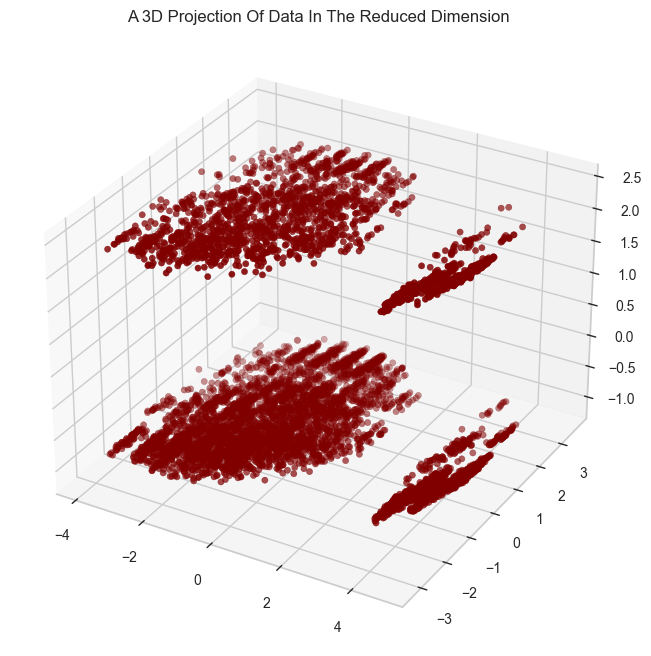

In [350]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [351]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


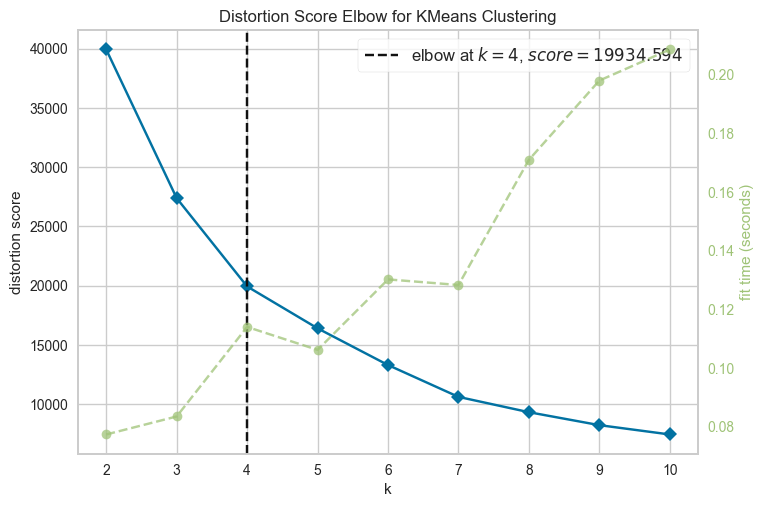

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [352]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [353]:
from sklearn.cluster import AgglomerativeClustering

In [354]:
new_df = new_df.dropna()

In [355]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
new_df["Clusters w/ PCA"]= yhat_AC

In [356]:
new_df.head()

,Customer ID,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Location_Bandung,Location_Jakarta,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa,Clusters w/ PCA
0,1710,1,0,0.0,0,0,1,0,0,24.505,1,5371.6,3,0,1,0,0,1,0,2
1,1094,9,0,0.0,0,0,1,0,0,24.635,1,7023.9,2,0,1,0,0,1,0,2
2,143,12,0,0.0,0,0,1,0,0,24.700,1,4595.5,3,0,1,0,0,1,0,2
3,1140,1,0,0.0,0,0,1,0,0,24.830,1,7657.0,2,1,0,0,0,1,0,4
4,244,7,0,0.0,0,0,1,0,0,25.025,1,5835.7,0,1,0,0,0,0,1,4


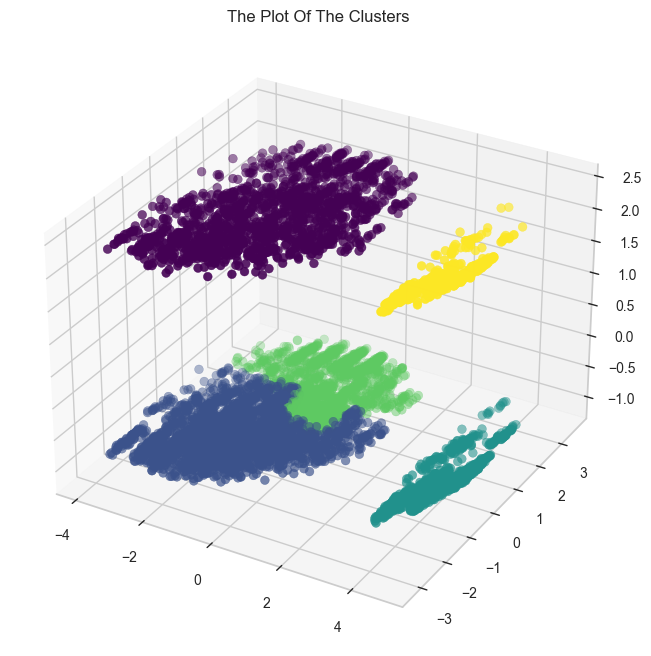

In [357]:
# Pilih peta warna, misalnya 'viridis', 'coolwarm', atau yang lain sesuai preferensi Anda
cmap = plt.get_cmap('viridis')
# Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

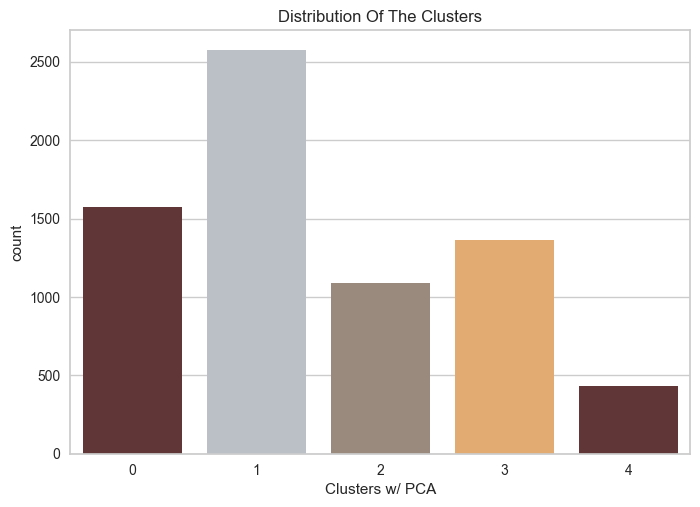

In [359]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=new_df["Clusters w/ PCA"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<AxesSubplot:>

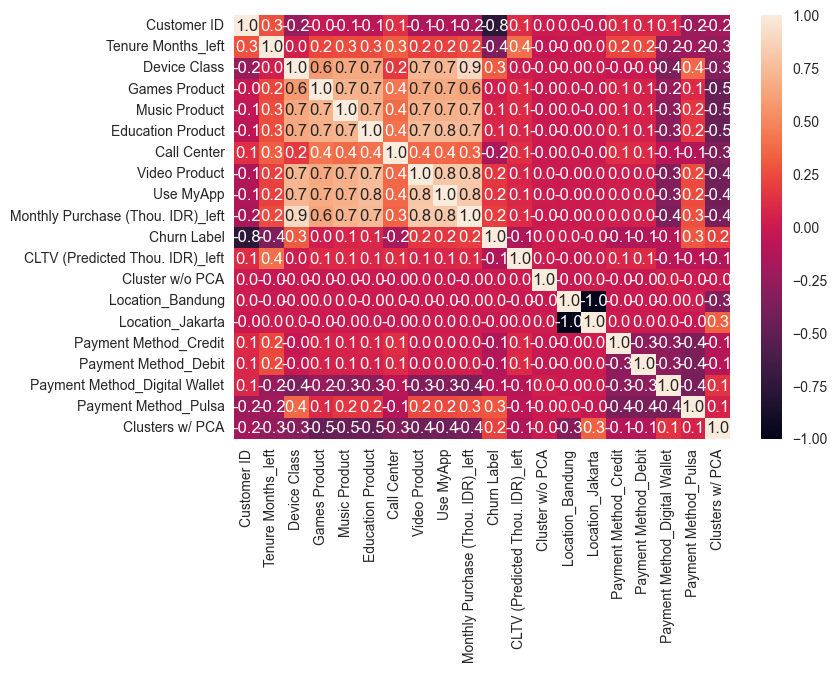

In [360]:
sns.heatmap(new_df.corr(), annot=True, fmt='.1f')

c:\ProgramData\Anaconda3\envs\smartcom\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  """Entry point for launching an IPython kernel.


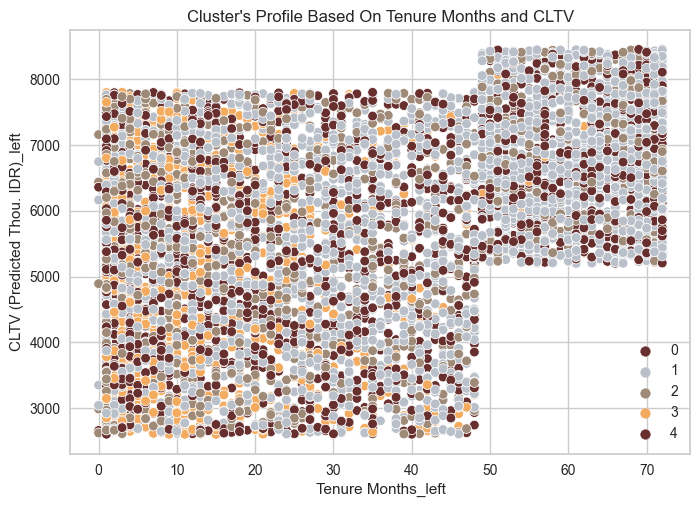

In [361]:
pl = sns.scatterplot(data = new_df,x=new_df["Tenure Months_left"], y=new_df["CLTV (Predicted Thou. IDR)_left"],hue=new_df["Clusters w/ PCA"], palette= pal)
pl.set_title("Cluster's Profile Based On Tenure Months and CLTV")
plt.legend()
plt.show()

c:\ProgramData\Anaconda3\envs\smartcom\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  """Entry point for launching an IPython kernel.


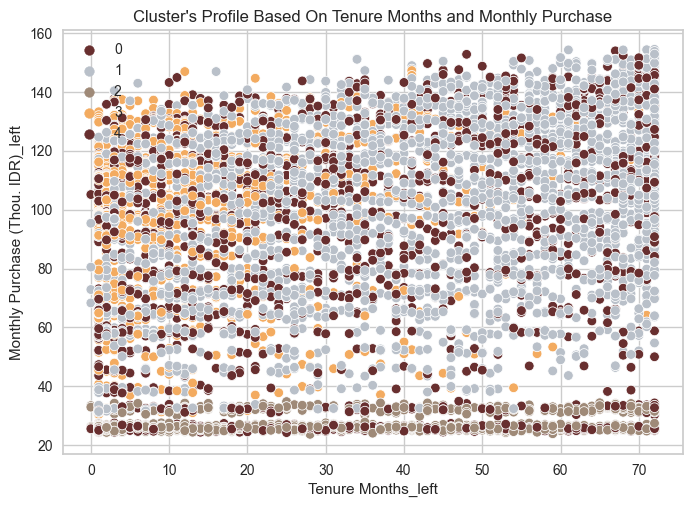

In [363]:
pl = sns.scatterplot(data = new_df,x=new_df["Tenure Months_left"], y=new_df["Monthly Purchase (Thou. IDR)_left"],hue=new_df["Clusters w/ PCA"], palette= pal)
pl.set_title("Cluster's Profile Based On Tenure Months and Monthly Purchase")
plt.legend()
plt.show()

c:\ProgramData\Anaconda3\envs\smartcom\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  """Entry point for launching an IPython kernel.


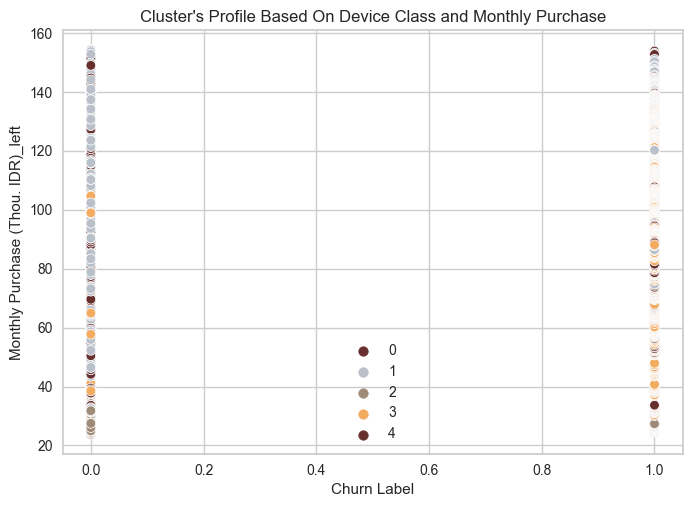

In [365]:
pl = sns.scatterplot(data = new_df,x=new_df["Churn Label"], y=new_df["Monthly Purchase (Thou. IDR)_left"],hue=new_df["Clusters w/ PCA"], palette= pal)
pl.set_title("Cluster's Profile Based On Device Class and Monthly Purchase")
plt.legend()
plt.show()

In [366]:
#ordinal mapping
revmap_dev = {
    0: 'Low End',
    1: 'Mid End',
    2: 'High End',
}

revmap_prod = {
    0: 'No internet service',
    1: 'No',
    2: 'Yes',
}

revmap_churn = {
    0: 'No',
    1: 'Yes',
}

In [367]:
# Terapkan mapping ke kolom dataframe
new_df['Device Class'] = new_df['Device Class'].map(revmap_dev)
new_df['Churn Label'] = new_df['Churn Label'].map(revmap_churn)

prod_cols = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']
for col in prod_cols:
    # Terapkan mapping ke kolom dataframe
    new_df[col] = new_df[col].map(revmap_prod)

new_df.head()

,Customer ID,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Location_Bandung,Location_Jakarta,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa,Clusters w/ PCA
0,1710,1,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,24.505,Yes,5371.6,3,0,1,0,0,1,0,2
1,1094,9,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,24.635,Yes,7023.9,2,0,1,0,0,1,0,2
2,143,12,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,24.700,Yes,4595.5,3,0,1,0,0,1,0,2
3,1140,1,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,24.830,Yes,7657.0,2,1,0,0,0,1,0,4
4,244,7,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,25.025,Yes,5835.7,0,1,0,0,0,0,1,4


In [369]:
# Mendekode hasil one-hot encoding
df_decoded = new_df.copy()  # Copy DataFrame hasil encoding
df_decoded['Location'] = df_decoded[['Location_Bandung', 'Location_Jakarta']].idxmax(axis=1).str.replace('Location_', '')
df_decoded['Payment Method'] = df_decoded[['Payment Method_Credit', 'Payment Method_Debit', 'Payment Method_Digital Wallet', 'Payment Method_Pulsa']].idxmax(axis=1).str.replace('Payment Method_', '')

# Hapus kolom hasil encoding
df_decoded.drop(['Location_Bandung', 'Location_Jakarta', 'Payment Method_Credit', 'Payment Method_Debit', 'Payment Method_Digital Wallet', 'Payment Method_Pulsa'], axis=1, inplace=True)
df_decoded.head()

,Customer ID,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Clusters w/ PCA,Location,Payment Method
0,1710,1,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,24.505,Yes,5371.6,3,2,Jakarta,Digital Wallet
1,1094,9,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,24.635,Yes,7023.9,2,2,Jakarta,Digital Wallet
2,143,12,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,24.700,Yes,4595.5,3,2,Jakarta,Digital Wallet
3,1140,1,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,24.830,Yes,7657.0,2,4,Bandung,Digital Wallet
4,244,7,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,25.025,Yes,5835.7,0,4,Bandung,Pulsa


In [371]:
new_df.to_csv('newresult_cluster.csv', index=False)